In [2]:
import os

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
from epiweeks import Week
from datetime import datetime, timedelta
from matplotlib.patches import Circle
import matplotlib.ticker
from matplotlib.lines import Line2D
import numpy as np
from utils import timeseries_formatting, basic_formatting, dec_to_date, hpd, _toYearFraction, get_okabe_ito_palette
from dendropy import TreeList, Tree
import time
import seaborn as sns
import matplotlib.patheffects as PathEffects
import geopandas as gpd
from matplotlib.colors import Normalize
import matplotlib.cm as mcm
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import haversine_distances

prop = mpl.font_manager.FontProperties('Roboto')
mpl.rcParams['font.sans-serif'] = prop.get_name()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.size']=16

COLOR = '#343434'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [3]:
sd = pd.read_csv( "../analyses/estimated-importation-risk/back-calculated-infections.csv", usecols=["date", "location", "cases"], parse_dates=["date"] )
sd = sd.loc[sd["location"]=="San Diego County"]
sd["cases"] = sd["cases"].rolling( 7, min_periods=1 ).mean()
sd.head()

,date,location,cases
224046,2020-01-20,San Diego County,0.0
224047,2020-01-21,San Diego County,0.0
224048,2020-01-22,San Diego County,0.0
224049,2020-01-23,San Diego County,0.0
224050,2020-01-24,San Diego County,0.0


/Users/natem/Dropbox (Scripps Research)/Personal/Code/Projects/project_2021_california-hcov-genomics/analyses/utils.py:59: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim( ylims )


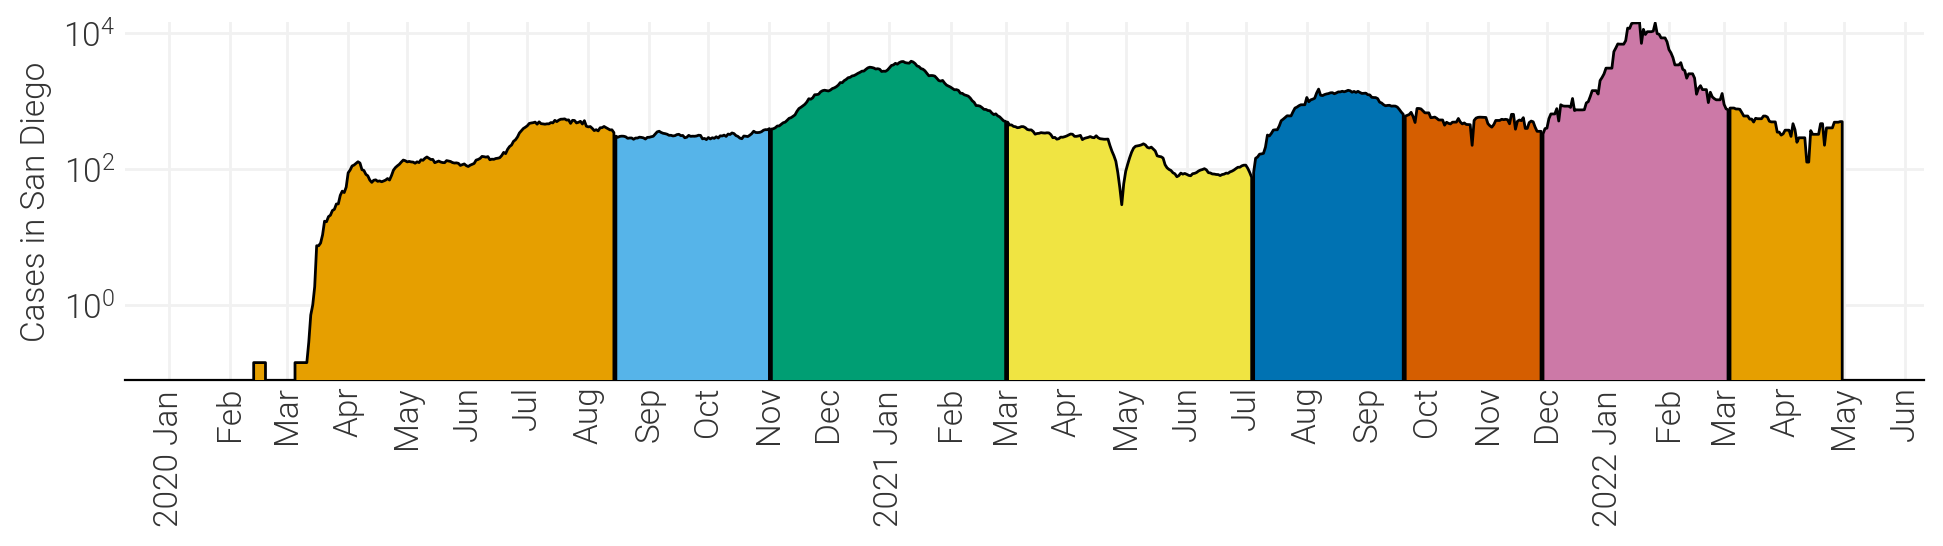

In [5]:
fig, ax = plt.subplots( dpi=200, figsize=(10,3) )

waves = [
    ("First wave", ["2020-08-15"]),
    ("First trough", ["2020-08-15", "2020-11-02"]),
    ("Second wave", ["2020-11-02", "2021-03-02"]),
    ("Second trough", ["2021-03-02", "2021-07-05"]),
    ("Third wave", ["2021-07-05", "2021-09-20"]),
    ("Third trough", ["2021-09-20", "2021-11-29"]),
    ("Fourth wave", ["2021-11-29", "2022-03-04"]),
    ("Fourth trough", ["2022-03-04", "2022-05-01"])
]

colors = get_okabe_ito_palette()
count = 0
for name, date_range in waves:
    if len( date_range ) == 1:
        temp = sd.loc[sd.date < date_range[0]]
    else:
        try:
            temp = sd.loc[( date_range[0] <= sd["date"] ) & ( sd["date"] < date_range[1] )]
        except TypeError:
            print( date_range )
            print( name )
            raise
    ax.fill_between( temp["date"], temp["cases"], color=colors[count], linewidth=1, edgecolor="black", zorder=10+count )
    count += 1
    if count == len( colors ):
        count = 0

ax.set_yscale( "log" )


basic_formatting( ax, ylabel="Cases in San Diego", which="both", ylims=(0,14250) )
timeseries_formatting( ax )
#ax.set_xticklabels([])

#ax.set_ylabel( "Cases", fontweight="bold" )

#legend = [Patch(facecolor='#CD8361', edgecolor='black', label='$\mathregular{1^{st}}$ wave (>2020-09-15)'),
#          Patch(facecolor='#DDBD72', edgecolor='black', label='$\mathregular{1^{st}}$ trough (2020-09-16—2020-11-15)'),
#          Patch(facecolor='#9F90C4', edgecolor='black', label='$\mathregular{2^{nd}}$ wave (2020-11-16—2021-02-22)'),
#          Patch(facecolor='#C6B6D9', edgecolor='black', label='$\mathregular{2^{nd}}$ trough (2020-02-23<)')]

#ax.legend( loc="upper left", handles=legend, frameon=False )
plt.tight_layout()
plt.savefig( "../analyses/plots/san-diego-waves.pdf" )
plt.show()